C:\Users\purav\AppData\Local\Temp\ipykernel_14552\1983841059.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid["centroid"] = grid.geometry.centroid


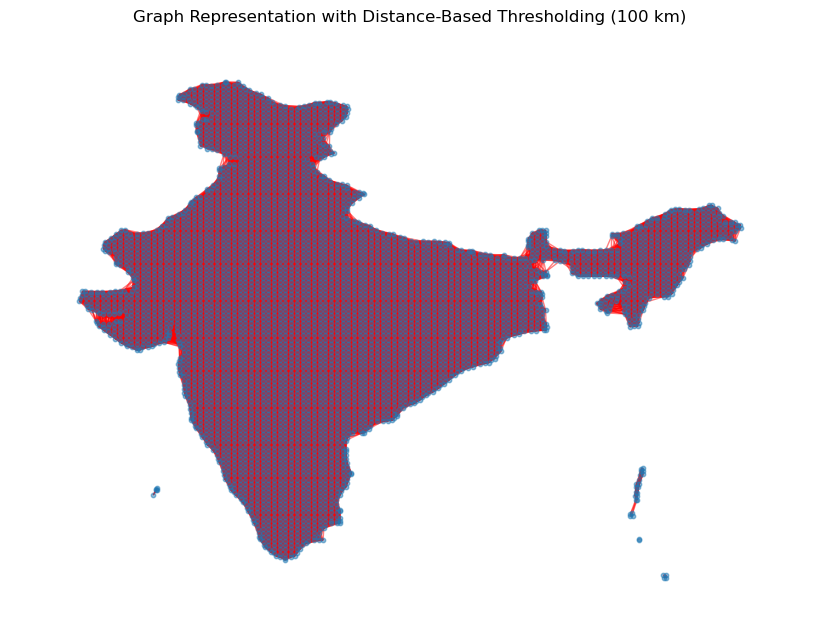

In [ ]:
import geopandas as gpd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Load the grid with mapped data
grid_path = r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Processed\grid_with_data.geojson"
grid = gpd.read_file(grid_path)

# Extract centroids as node positions
grid["centroid"] = grid.geometry.centroid
node_positions = np.array([(p.x, p.y) for p in grid["centroid"]])

# Define distance threshold (100 km converted to degrees ~ 0.9° for lat/lon)
distance_threshold = 0.9  # Rough approximation for ~100 km

# Build KDTree for efficient distance search
tree = cKDTree(node_positions)
pairs = tree.query_pairs(distance_threshold)

# Construct graph
G = nx.Graph()

# Add nodes with attributes
for i, (x, y) in enumerate(node_positions):
    G.add_node(i, pos=(x, y))

# Add edges only if distance is below threshold
for i, j in pairs:
    G.add_edge(i, j)

# Visualization
plt.figure(figsize=(8, 6))
pos = {i: (x, y) for i, (x, y) in enumerate(node_positions)}
nx.draw(G, pos, node_size=3, edge_color="red", alpha=0.5, with_labels=False,edge_cmap=plt.cm.Blues)
plt.title("Graph Representation with Distance-Based Thresholding (100 km)")
plt.show()

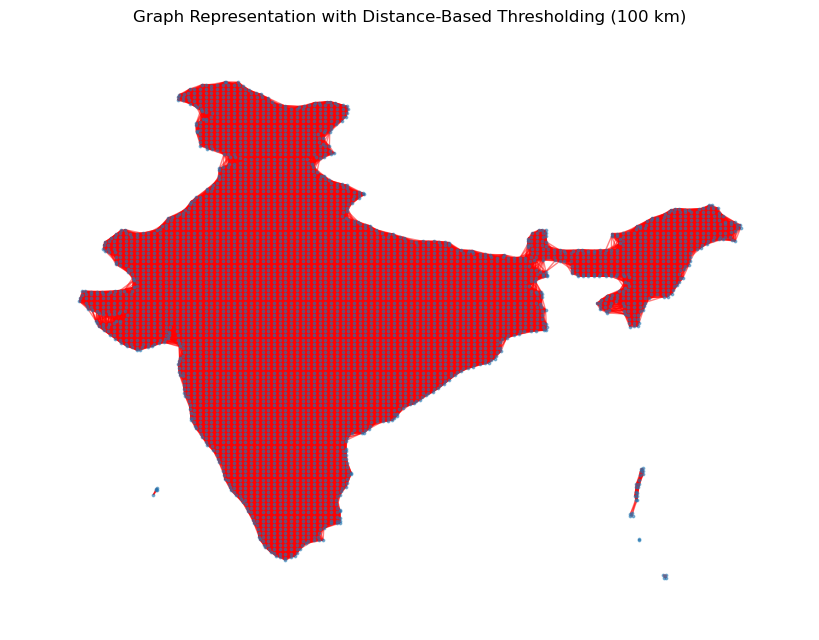

In [4]:
plt.figure(figsize=(8, 6))
pos = {i: (x, y) for i, (x, y) in enumerate(node_positions)}
nx.draw(G, pos, node_size=3, edge_color="red", alpha=0.5, with_labels=False)
plt.title("Graph Representation with Distance-Based Thresholding (100 km)")
plt.show()

C:\Users\purav\AppData\Local\Temp\ipykernel_14552\1614265580.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid["centroid"] = grid.geometry.centroid


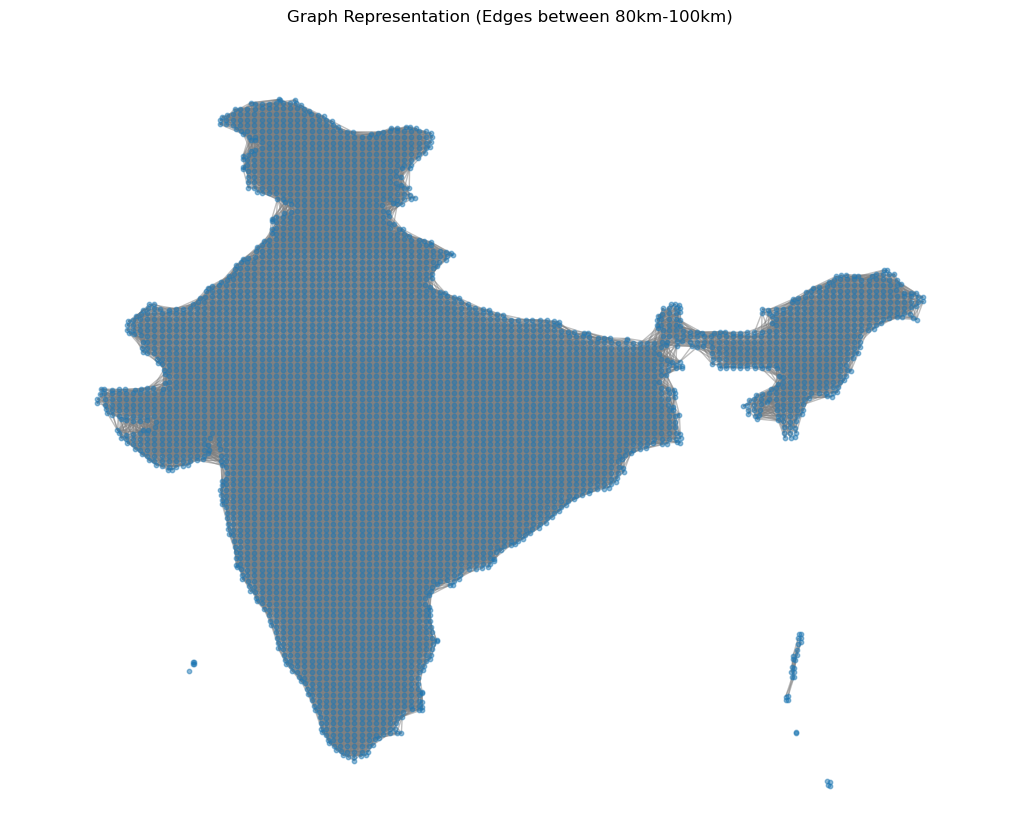

In [6]:
import geopandas as gpd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from haversine import haversine, Unit

# Load the grid with mapped data
grid_path = r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Processed\grid_with_data.geojson"
grid = gpd.read_file(grid_path)

# Extract centroids as node positions
grid["centroid"] = grid.geometry.centroid
node_positions = [(p.x, p.y) for p in grid["centroid"]]

# Build KDTree for efficient distance querying
tree = cKDTree(node_positions)

# Define distance threshold (80 km to 100 km)
min_distance_km = 80
max_distance_km = 100

# Create graph
G = nx.Graph()

# Add nodes
for i, (x, y) in enumerate(node_positions):
    G.add_node(i, pos=(x, y))

# Add edges based on distance thresholding
for i, (x1, y1) in enumerate(node_positions):
    for j in range(i + 1, len(node_positions)):  # Avoid duplicate edges
        x2, y2 = node_positions[j]
        dist_km = haversine((y1, x1), (y2, x2), unit=Unit.KILOMETERS)
        
        if min_distance_km <= dist_km <= max_distance_km:
            G.add_edge(i, j)

# Visualization
plt.figure(figsize=(10, 8))
pos = {i: (x, y) for i, (x, y) in enumerate(node_positions)}
nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.5, with_labels=False)
plt.title("Graph Representation (Edges between 80km-100km)")
plt.show()
